In [238]:
import warnings
warnings.filterwarnings('ignore')

In [239]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from pathlib import Path
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from matplotlib import pyplot 

In [240]:
columns = [
    "HeartDisease", "BMI", "Smoking", "AlcoholDrinking",
    "Stroke", "PhysicalHealth", "MentalHealth", "DiffWalking",
    "Sex", "AgeCategory", "Race", "Diabetic",
    "PhysicalActivity", "GenHealth", "SleepTime", "Asthma",
    "KidneyDisease","SkinCancer"
]

target = ["HeartDisease"]

In [241]:
healthy_hearts_df = pd.read_csv("Resources/heart_2020_cleaned.csv")
healthy_hearts_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [242]:
# Convert Yes and No to 1 and 0 respectively 
x = {'Yes': 1}   
healthy_hearts_df = healthy_hearts_df.replace(x)

x = {'No': 0}    
healthy_hearts_df = healthy_hearts_df.replace(x)

# Convert numeric Diabetic values back to Yes and No for encoding 
healthy_hearts_df.loc[(healthy_hearts_df.HeartDisease == 0), 'HeartDisease'] = "No"
healthy_hearts_df.loc[(healthy_hearts_df.HeartDisease == 1), 'HeartDisease'] = "Yes"

healthy_hearts_df.reset_index(inplace=True, drop=True)

In [243]:
healthy_hearts_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,No,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,No,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,No,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,No,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,1,0,0,7.0,0.0,1,Male,60-64,Hispanic,1,0,Fair,6.0,1,0,0
319791,No,29.84,1,0,0,0.0,0.0,0,Male,35-39,Hispanic,0,1,Very good,5.0,1,0,0
319792,No,24.24,0,0,0,0.0,0.0,0,Female,45-49,Hispanic,0,1,Good,6.0,0,0,0
319793,No,32.81,0,0,0,0.0,0.0,0,Female,25-29,Hispanic,0,0,Good,12.0,0,0,0


In [244]:
# Determine the number of unique values in each column.
healthy_hearts_df.nunique()


HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [245]:
#Check the data types of each column 
healthy_hearts_df.dtypes

HeartDisease         object
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity      int64
GenHealth            object
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

In [246]:
# Convert numeric Diabetic values back to Yes and No for encoding 
healthy_hearts_df.loc[(healthy_hearts_df.Diabetic == 0), 'Diabetic'] = "No"
healthy_hearts_df.loc[(healthy_hearts_df.Diabetic == 1), 'Diabetic'] = "Yes"

healthy_hearts_df['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [247]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame for Sex
encode_df = pd.DataFrame(enc.fit_transform(healthy_hearts_df.Sex.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Sex'])

# Fit the encoder and produce encoded DataFrame for Age Category 
encode_df2 = pd.DataFrame(enc.fit_transform(healthy_hearts_df.AgeCategory.values.reshape(-1,1)))

# Rename encoded columns
encode_df2.columns = enc.get_feature_names(['AgeCategory'])
encode_df = encode_df.merge(encode_df2,left_index=True,right_index=True)

# Fit the encoder and produce encoded DataFrame for Race
encode_df3 = pd.DataFrame(enc.fit_transform(healthy_hearts_df.Race.values.reshape(-1,1)))

# Rename encoded columns
encode_df3.columns = enc.get_feature_names(['Race'])
encode_df3.head()
encode_df = encode_df.merge(encode_df3,left_index=True,right_index=True)

# Fit the encoder and produce encoded DataFrame for General Health
encode_df4 = pd.DataFrame(enc.fit_transform(healthy_hearts_df.GenHealth.values.reshape(-1,1)))

# Rename encoded columns
encode_df4.columns = enc.get_feature_names(['GenHealth'])
encode_df = encode_df.merge(encode_df4,left_index=True,right_index=True)

# Fit the encoder and produce encoded DataFrame for Diabetes
encode_df5 = pd.DataFrame(enc.fit_transform(healthy_hearts_df.Diabetic.values.reshape(-1,1)))

# Rename encoded columns
encode_df5.columns = enc.get_feature_names(['Diabetic'])
encode_df = encode_df.merge(encode_df5,left_index=True,right_index=True)
encode_df

,Sex_Female,Sex_Male,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,...,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
319791,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
319792,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
319793,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [248]:
#Merge the dataframes and drop the original columns that were encoded 
healthy_hearts_df2 = healthy_hearts_df.merge(encode_df,left_index=True,right_index=True).drop(["GenHealth","Sex","Race","Diabetic","AgeCategory"],axis=1)
healthy_hearts_df2

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,...,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,No,16.60,1,0,0,3.0,30.0,0,1,5.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,No,20.34,0,0,1,0.0,0.0,0,1,7.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,No,26.58,1,0,0,20.0,30.0,0,1,8.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,No,24.21,0,0,0,0.0,0.0,0,0,6.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,No,23.71,0,0,0,28.0,0.0,1,1,8.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,1,0,0,7.0,0.0,1,0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
319791,No,29.84,1,0,0,0.0,0.0,0,1,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
319792,No,24.24,0,0,0,0.0,0.0,0,1,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
319793,No,32.81,0,0,0,0.0,0.0,0,0,12.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [249]:
# Create our features
x_cols = [i for i in healthy_hearts_df2.columns if i not in ('HeartDisease')]
X = healthy_hearts_df2[x_cols]
X=pd.get_dummies(X)

# Create our target
y = healthy_hearts_df['HeartDisease']

In [250]:
# Check the amount of points for each result in the Data frame 
y.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [251]:
# Split into testing and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1, stratify=y)
Counter(y_train)

Counter({'No': 219316, 'Yes': 20530})

In [252]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)
Counter(y_resampled)

Counter({'No': 219316, 'Yes': 219316})

In [253]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [254]:
# Calculated the balanced accuracy score
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7499781110457917

In [255]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)


array([[55136, 17970],
       [ 2019,  4824]], dtype=int64)

In [256]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

         No       0.96      0.75      0.70      0.85      0.73      0.53     73106
        Yes       0.21      0.70      0.75      0.33      0.73      0.53      6843

avg / total       0.90      0.75      0.71      0.80      0.73      0.53     79949



In [257]:
# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=87) 
rf_model = rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

In [258]:
# Calculating the accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8869529324944653

In [259]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[69656,  3450],
       [ 5588,  1255]], dtype=int64)

In [260]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

         No       0.93      0.95      0.18      0.94      0.42      0.19     73106
        Yes       0.27      0.18      0.95      0.22      0.42      0.16      6843

avg / total       0.87      0.89      0.25      0.88      0.42      0.19     79949



In [261]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,...,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,16.60,1,0,0,3.0,30.0,0,1,5.0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,20.34,0,0,1,0.0,0.0,0,1,7.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,26.58,1,0,0,20.0,30.0,0,1,8.0,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,24.21,0,0,0,0.0,0.0,0,0,6.0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,23.71,0,0,0,28.0,0.0,1,1,8.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,0,6.0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
319791,29.84,1,0,0,0.0,0.0,0,1,5.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
319792,24.24,0,0,0,0.0,0.0,0,1,6.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
319793,32.81,0,0,0,0.0,0.0,0,0,12.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Feature: 0, Score: 0.16030
Feature: 1, Score: 0.01189
Feature: 2, Score: 0.00660
Feature: 3, Score: 0.00649
Feature: 4, Score: 0.03901
Feature: 5, Score: 0.03172
Feature: 6, Score: 0.00989
Feature: 7, Score: 0.01927
Feature: 8, Score: 0.06711
Feature: 9, Score: 0.00900
Feature: 10, Score: 0.00528
Feature: 11, Score: 0.00826
Feature: 12, Score: 0.02732
Feature: 13, Score: 0.02746
Feature: 14, Score: 0.00902
Feature: 15, Score: 0.00536
Feature: 16, Score: 0.00794
Feature: 17, Score: 0.00965
Feature: 18, Score: 0.01115
Feature: 19, Score: 0.00953
Feature: 20, Score: 0.01175
Feature: 21, Score: 0.01357
Feature: 22, Score: 0.01861
Feature: 23, Score: 0.02469
Feature: 24, Score: 0.03628
Feature: 25, Score: 0.03598
Feature: 26, Score: 0.05796
Feature: 27, Score: 0.00178
Feature: 28, Score: 0.00132
Feature: 29, Score: 0.00721
Feature: 30, Score: 0.00750
Feature: 31, Score: 0.00295
Feature: 32, Score: 0.04617
Feature: 33, Score: 0.03425
Feature: 34, Score: 0.04662
Feature: 35, Score: 0.02994
Fe

<function matplotlib.pyplot.show(close=None, block=None)>

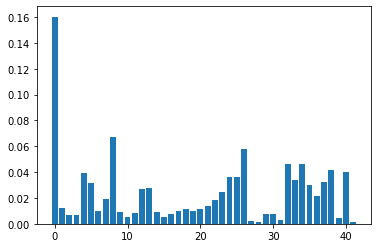

In [262]:
# get importance 
importance = rf_model.feature_importances_

#summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

#plot feature importance 
pyplot.bar([x for x in range(len(importance))],importance)
pyplot.show

In [263]:
importance

array([0.16030472, 0.01189083, 0.00659738, 0.00649486, 0.03900899,
       0.03171665, 0.00988621, 0.01926698, 0.06711493, 0.00900353,
       0.00528304, 0.00825762, 0.02731852, 0.02745818, 0.00901742,
       0.00535696, 0.00793928, 0.00965381, 0.01115   , 0.00952976,
       0.0117543 , 0.01357082, 0.01860572, 0.02468806, 0.03627837,
       0.03597598, 0.05795507, 0.00178178, 0.00131963, 0.00720721,
       0.00749552, 0.00295098, 0.04617213, 0.03425261, 0.04661506,
       0.02993903, 0.02154758, 0.03227338, 0.0415685 , 0.00444611,
       0.03995535, 0.00139713])

In [264]:
# Find the features where the importance is greater than 0.04
result = np.where(importance > 0.04)
result

(array([ 0,  8, 26, 32, 34, 38], dtype=int64),)

In [265]:
# Label the highest features
x_cols = [i for i in X.columns]
print(x_cols[0], importance[0])
print(x_cols[8], importance[8])
print(x_cols[26], importance[26])
print(x_cols[32], importance[32])
print(x_cols[34], importance[34])
print(x_cols[38], importance[38])

BMI 0.16030472442248553
SleepTime 0.06711492747244974
AgeCategory_80 or older 0.05795506789701354
Race_White 0.04617213098958255
GenHealth_Fair 0.046615058292058593
Diabetic_No 0.04156849555318793


In [266]:
# Find the features where the importance is less than 0.005
result = np.where(importance < 0.005)
result

(array([27, 28, 31, 39, 41], dtype=int64),)

In [267]:
# Label the lowest features

print(x_cols[27], importance[27])
print(x_cols[28], importance[28])
print(x_cols[31], importance[31])
print(x_cols[39], importance[39])
print(x_cols[41], importance[41])

Race_American Indian/Alaskan Native 0.001781780119298911
Race_Asian 0.0013196280189086518
Race_Other 0.002950978420333322
Diabetic_No, borderline diabetes 0.004446111229542395
Diabetic_Yes (during pregnancy) 0.001397130215589179


In [268]:
#See the distribution of races considering one Race is a top contributer while others are bottom contributors
healthy_hearts_df['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [269]:
#See the distribution of races considering other coluns are better contributers while others are bottom contributors
healthy_hearts_df['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [270]:
# Find the features where the importance is less than 0.005
result = np.where(importance < 0.01)
result

(array([ 2,  3,  6,  9, 10, 11, 14, 15, 16, 17, 19, 27, 28, 29, 30, 31, 39,
        41], dtype=int64),)

In [271]:
# Label the features with a score under 0.01
print(x_cols[2], importance[2])
print(x_cols[3], importance[3])
print(x_cols[6], importance[6])
print(x_cols[9], importance[9])
print(x_cols[10], importance[10])
print(x_cols[11], importance[11])
print(x_cols[14], importance[14])
print(x_cols[15], importance[15])
print(x_cols[16], importance[16])
print(x_cols[17], importance[17])
print(x_cols[30], importance[30])
print(x_cols[19], importance[19])
print(x_cols[29], importance[29])

AlcoholDrinking 0.006597377741389215
Stroke 0.006494862179335739
DiffWalking 0.00988621322707673
Asthma 0.009003528924876044
KidneyDisease 0.005283040506656586
SkinCancer 0.00825762280374797
AgeCategory_18-24 0.009017422895524053
AgeCategory_25-29 0.005356961431232552
AgeCategory_30-34 0.007939282933589998
AgeCategory_35-39 0.009653806712358885
Race_Hispanic 0.007495518243167135
AgeCategory_45-49 0.009529762875087076
Race_Black 0.007207209231849128


In [272]:
#See the distribution of Ages considering one Age is a top contributer while others are bottom contributors
healthy_hearts_df['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [273]:
# Find the features of the rest under 0.025
result = np.where((importance > 0.01) & (importance < 0.025))
result

(array([ 1,  7, 18, 20, 21, 22, 23, 36], dtype=int64),)

In [274]:
# Label the features with a score under 0.025 and over 0.01 (lower middle)
print(x_cols[1], importance[1])
print(x_cols[7], importance[7])
print(x_cols[18], importance[18])
print(x_cols[20], importance[20])
print(x_cols[21], importance[21])
print(x_cols[22], importance[22])
print(x_cols[23], importance[23])
print(x_cols[36], importance[36])


Smoking 0.011890833240444041
PhysicalActivity 0.01926698217347612
AgeCategory_40-44 0.01115000117596726
AgeCategory_50-54 0.011754302222839342
AgeCategory_55-59 0.013570819424254399
AgeCategory_60-64 0.018605718500288984
AgeCategory_65-69 0.024688059475207805
GenHealth_Poor 0.021547581820156324


In [275]:
# Find the features of the rest under 0.025
result = np.where((importance > 0.025) & (importance < 0.05))
result

(array([ 4,  5, 12, 13, 24, 25, 32, 33, 34, 35, 37, 38, 40], dtype=int64),)

In [276]:
# Label the features with a score under 0.05 and over 0.025 (upper middle)

print(x_cols[13], importance[13])
print(x_cols[24], importance[24])
print(x_cols[25], importance[25])
print(x_cols[32], importance[32])
print(x_cols[33], importance[33])
print(x_cols[34], importance[34])
print(x_cols[37], importance[37])
print(x_cols[38], importance[38])
print(x_cols[4], importance[4])
print(x_cols[5], importance[5])
print(x_cols[12], importance[12])
print(x_cols[35], importance[35])


Sex_Male 0.027458183004212645
AgeCategory_70-74 0.03627836871803147
AgeCategory_75-79 0.03597597960234881
Race_White 0.04617213098958255
GenHealth_Excellent 0.03425261190631276
GenHealth_Fair 0.046615058292058593
GenHealth_Very good 0.03227337834670292
Diabetic_No 0.04156849555318793
PhysicalHealth 0.039008986157028414
MentalHealth 0.03171664711587441
Sex_Female 0.02731852175335695
GenHealth_Good 0.029939033550192912


In [277]:
#Testing the effect on the accuracy score when removing race
x_cols = [i for i in X.columns if i not in ('Race_White', 'Race_Black','Race_Hispanic','Race_Other','Race_Asian','Race_American Indian/Alaskan Native')]
X_race = X[x_cols]
X_race

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,...,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,16.60,1,0,0,3.0,30.0,0,1,5.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,20.34,0,0,1,0.0,0.0,0,1,7.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,26.58,1,0,0,20.0,30.0,0,1,8.0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,24.21,0,0,0,0.0,0.0,0,0,6.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,23.71,0,0,0,28.0,0.0,1,1,8.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,0,6.0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
319791,29.84,1,0,0,0.0,0.0,0,1,5.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
319792,24.24,0,0,0,0.0,0.0,0,1,6.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
319793,32.81,0,0,0,0.0,0.0,0,0,12.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [278]:
# Split into testing and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_race,
    y, random_state=1, stratify=y)


# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)


# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=87) 
rf_model = rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

# Calculating the accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8818997110658044

In [279]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)


array([[69189,  3917],
       [ 5525,  1318]], dtype=int64)

In [280]:
#Accuracy has stayed the same without any of the races in the dataset. This measure is not important enough to keep in further testing 
X = X_race
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,...,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,16.60,1,0,0,3.0,30.0,0,1,5.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,20.34,0,0,1,0.0,0.0,0,1,7.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,26.58,1,0,0,20.0,30.0,0,1,8.0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,24.21,0,0,0,0.0,0.0,0,0,6.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,23.71,0,0,0,28.0,0.0,1,1,8.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,0,6.0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
319791,29.84,1,0,0,0.0,0.0,0,1,5.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
319792,24.24,0,0,0,0.0,0.0,0,1,6.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
319793,32.81,0,0,0,0.0,0.0,0,0,12.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [281]:
# Test accuracy with Diabetes types yes and no only 
x_cols = [i for i in X.columns if i not in ('Diabetic_Yes (during pregnancy)', 'Diabetic_No, borderline diabetes')]
X_diabetes = X[x_cols]
X_diabetes

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,Diabetic_Yes
0,16.60,1,0,0,3.0,30.0,0,1,5.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,20.34,0,0,1,0.0,0.0,0,1,7.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,26.58,1,0,0,20.0,30.0,0,1,8.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,24.21,0,0,0,0.0,0.0,0,0,6.0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,23.71,0,0,0,28.0,0.0,1,1,8.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,0,6.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
319791,29.84,1,0,0,0.0,0.0,0,1,5.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
319792,24.24,0,0,0,0.0,0.0,0,1,6.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
319793,32.81,0,0,0,0.0,0.0,0,0,12.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [282]:
# Split into testing and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_diabetes,
    y, random_state=1, stratify=y)


# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)


# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=87) 
rf_model = rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

# Calculating the accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8816870755106381

In [283]:
#Accuracy has stayed the same without any of the races in the dataset. This measure is not important enough to keep in further testing 
X = X_diabetes
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,Diabetic_Yes
0,16.60,1,0,0,3.0,30.0,0,1,5.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,20.34,0,0,1,0.0,0.0,0,1,7.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,26.58,1,0,0,20.0,30.0,0,1,8.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,24.21,0,0,0,0.0,0.0,0,0,6.0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,23.71,0,0,0,28.0,0.0,1,1,8.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,0,6.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
319791,29.84,1,0,0,0.0,0.0,0,1,5.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
319792,24.24,0,0,0,0.0,0.0,0,1,6.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
319793,32.81,0,0,0,0.0,0.0,0,0,12.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [284]:
# Test dataset without ages under 60 
x_cols = [i for i in X.columns if i not in ('AgeCategory_18-24', 'AgeCategory_25-29','AgeCategory_30-34','AgeCategory_35-39','AgeCategory_55-59','AgeCategory_40-44','AgeCategory_45-49','AgeCategory_50-54')]
X_age = X[x_cols]
X_age

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,Diabetic_Yes
0,16.60,1,0,0,3.0,30.0,0,1,5.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,20.34,0,0,1,0.0,0.0,0,1,7.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,26.58,1,0,0,20.0,30.0,0,1,8.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,24.21,0,0,0,0.0,0.0,0,0,6.0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,23.71,0,0,0,28.0,0.0,1,1,8.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,0,6.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
319791,29.84,1,0,0,0.0,0.0,0,1,5.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
319792,24.24,0,0,0,0.0,0.0,0,1,6.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
319793,32.81,0,0,0,0.0,0.0,0,0,12.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [285]:
# Split into testing and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_age,
    y, random_state=1, stratify=y)


# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)


# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=87) 
rf_model = rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

# Calculating the accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8814244080601383

In [286]:
#Accuracy is similar and slightly better so no need to add ages back 
X = X_age

In [287]:
#Test accuracy without the temaining features that showed an importance under 0.012
x_cols = [i for i in X.columns if i not in ('Smoking', 'DiffWalking','Asthma','KidneyDisease','Stroke','AlcoholDrinking','SkinCancer')]
X_filter = X[x_cols]
X_filter

,BMI,PhysicalHealth,MentalHealth,PhysicalActivity,SleepTime,Sex_Female,Sex_Male,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,Diabetic_Yes
0,16.60,3.0,30.0,1,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,20.34,0.0,0.0,1,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,26.58,20.0,30.0,1,8.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,24.21,0.0,0.0,0,6.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,23.71,28.0,0.0,1,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
319791,29.84,0.0,0.0,1,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
319792,24.24,0.0,0.0,1,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
319793,32.81,0.0,0.0,0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [288]:

# Split into testing and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_filter,
    y, random_state=1, stratify=y)


# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)


# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=87) 
rf_model = rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

# Calculating the accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8705299628513177

In [289]:
  X= X_filter

In [290]:
#Test some of the top features for accuracy 
x_cols = [i for i in X.columns if i not in ('Sex_Female','Sex_Male')]
X_top = X[x_cols]
X_top


,BMI,PhysicalHealth,MentalHealth,PhysicalActivity,SleepTime,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,Diabetic_Yes
0,16.60,3.0,30.0,1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,20.34,0.0,0.0,1,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,26.58,20.0,30.0,1,8.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,24.21,0.0,0.0,0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,23.71,28.0,0.0,1,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
319791,29.84,0.0,0.0,1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
319792,24.24,0.0,0.0,1,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
319793,32.81,0.0,0.0,0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [291]:
# Split into testing and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_top,
    y, random_state=1, stratify=y)


# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)


# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=87) 
rf_model = rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

# Calculating the accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8620870805138275

In [292]:
# Add Sex back in because the accuracy has dropped
# Try Adding back Race 

x_cols = [i for i in healthy_hearts_df2.columns if i in ('Race_White','Race_Black','Race_Other','Race_Asian','Race_Hispanic','Race_American Indian/Alaskan Native')]
X_hh = healthy_hearts_df2[x_cols]

X_top = X_hh.merge(X,left_index=True,right_index=True)
X_top

,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,BMI,PhysicalHealth,MentalHealth,PhysicalActivity,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,Diabetic_Yes
0,0.0,0.0,0.0,0.0,0.0,1.0,16.60,3.0,30.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,20.34,0.0,0.0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,26.58,20.0,30.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,24.21,0.0,0.0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,23.71,28.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.0,0.0,0.0,1.0,0.0,0.0,27.41,7.0,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
319791,0.0,0.0,0.0,1.0,0.0,0.0,29.84,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
319792,0.0,0.0,0.0,1.0,0.0,0.0,24.24,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
319793,0.0,0.0,0.0,1.0,0.0,0.0,32.81,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [293]:
# Split into testing and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_top,
    y, random_state=1, stratify=y)


# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)


# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=87) 
rf_model = rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

# Calculating the accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8777470637531426

In [294]:
# Now try removing Physical Acitivity
X = X_top

x_cols = [i for i in X.columns if i not in ('PhysicalActivity')]
X_PA = X[x_cols]
X_PA

,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,BMI,PhysicalHealth,MentalHealth,SleepTime,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,Diabetic_Yes
0,0.0,0.0,0.0,0.0,0.0,1.0,16.60,3.0,30.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,20.34,0.0,0.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,26.58,20.0,30.0,8.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,24.21,0.0,0.0,6.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,23.71,28.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.0,0.0,0.0,1.0,0.0,0.0,27.41,7.0,0.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
319791,0.0,0.0,0.0,1.0,0.0,0.0,29.84,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
319792,0.0,0.0,0.0,1.0,0.0,0.0,24.24,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
319793,0.0,0.0,0.0,1.0,0.0,0.0,32.81,0.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [295]:
# Split into testing and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_PA,
    y, random_state=1, stratify=y)


# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)


# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=87) 
rf_model = rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

# Calculating the accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8754581045416453

In [296]:
#Add back Physical Activity 
# Add back Smoking because it is larger than 0.1. When we removed values under 0.12 the accuracy dropped the most
x_cols = [i for i in healthy_hearts_df2.columns if i in ('Smoking')]
X_hh = healthy_hearts_df2[x_cols]

X_smoke = X_hh.merge(X,left_index=True,right_index=True)
X_smoke

,Smoking,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,BMI,PhysicalHealth,MentalHealth,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,Diabetic_Yes
0,1,0.0,0.0,0.0,0.0,0.0,1.0,16.60,3.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0,0.0,0.0,0.0,0.0,0.0,1.0,20.34,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,26.58,20.0,30.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,0.0,0.0,0.0,0.0,0.0,1.0,24.21,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,1.0,23.71,28.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0.0,0.0,0.0,1.0,0.0,0.0,27.41,7.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
319791,1,0.0,0.0,0.0,1.0,0.0,0.0,29.84,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
319792,0,0.0,0.0,0.0,1.0,0.0,0.0,24.24,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
319793,0,0.0,0.0,0.0,1.0,0.0,0.0,32.81,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [297]:
# Split into testing and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smoke,
    y, random_state=1, stratify=y)


# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)


# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=87) 
rf_model = rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

# Calculating the accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.879798371461807

In [298]:
# Try increasing age range. Start at 40 

X = X_smoke

x_cols = [i for i in healthy_hearts_df2.columns if i in ('AgeCategory_40-44','AgeCategory_45-49','AgeCategory_50-54','AgeCategory_55-59')]
X_hh = healthy_hearts_df2[x_cols]

X_increase = X_hh.merge(X,left_index=True,right_index=True)
X_increase

,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,Smoking,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,Diabetic_Yes
0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
319791,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
319792,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
319793,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [299]:
# Split into testing and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_increase,
    y, random_state=1, stratify=y)


# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)


# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=87) 
rf_model = rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

# Calculating the accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8810116449236388

In [300]:
#Add an age range until accuracy decreases 
X=X_increase
x_cols = [i for i in healthy_hearts_df2.columns if i in ('AgeCategory_35-39')]
X_hh = healthy_hearts_df2[x_cols]

X_increase = X_hh.merge(X,left_index=True,right_index=True)
X_increase

,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,Smoking,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,Diabetic_Yes
0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
319791,1.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
319792,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
319793,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [301]:
# Split into testing and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_increase,
    y, random_state=1, stratify=y)


# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)


# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=87) 
rf_model = rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

# Calculating the accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8808365332899724

In [302]:
#Add an age range until accuracy decreases
x_cols = [i for i in healthy_hearts_df2.columns if i in ('AgeCategory_30-34','AgeCategory_35-39')]
X_hh = healthy_hearts_df2[x_cols]

X_increase = X_hh.merge(X,left_index=True,right_index=True)
X_increase

,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,Smoking,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,Diabetic_Yes
0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
319791,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
319792,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
319793,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [303]:
# Split into testing and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_increase,
    y, random_state=1, stratify=y)


# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)


# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=87) 
rf_model = rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

# Calculating the accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8806614216563059

In [304]:
#Stop at this age. Continue to start at age 40
X

,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,Smoking,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,Diabetic_Yes
0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
319791,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
319792,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
319793,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [305]:
#Add DiffWalking
x_cols = [i for i in healthy_hearts_df2.columns if i in ('DiffWalking')]
X_hh = healthy_hearts_df2[x_cols]

X_DW = X_hh.merge(X,left_index=True,right_index=True)
X_DW

,DiffWalking,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,Smoking,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,Diabetic_Yes
0,0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
319791,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
319792,0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
319793,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [306]:
# Split into testing and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_DW,
    y, random_state=1, stratify=y)


# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)


# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=87) 
rf_model = rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

# Calculating the accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8823249821761373

In [307]:
X = X_DW
#These tests have shown that removing a top contributor in comparison to the other features has a much larger effect (negative) than removing a feature with little importance (positive)
#The model is consistently performing at a 88% accuracy rate

In [308]:
# Further examine Race
#Race has been the biggest question because most of the races have little importance but one Race has large importance, removing the race as a whole had a noticable negative effect
#We are going to test each race individually to see how they perform

#Remove all Race categories and add one back and only look at yes values to reduce distribution biases. Repeat individually for each race
x_cols = [i for i in X.columns if i not in ('Race_White','Race_Black','Race_Other','Race_Asian','Race_Hispanic','Race_American Indian/Alaskan Native')]
X = X[x_cols]

X

,DiffWalking,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,Smoking,BMI,PhysicalHealth,MentalHealth,PhysicalActivity,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,Diabetic_Yes
0,0,0.0,0.0,0.0,1.0,1,16.60,3.0,30.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0,0.0,0.0,0.0,0.0,0,20.34,0.0,0.0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,0.0,0.0,0.0,0.0,1,26.58,20.0,30.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,0.0,0.0,0.0,0.0,0,24.21,0.0,0.0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,1.0,0.0,0.0,0.0,0,23.71,28.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0.0,0.0,0.0,0.0,1,27.41,7.0,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
319791,0,0.0,0.0,0.0,0.0,1,29.84,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
319792,0,0.0,1.0,0.0,0.0,0,24.24,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
319793,0,0.0,0.0,0.0,0.0,0,32.81,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [309]:
# Split into testing and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1, stratify=y)


# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)


# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=87) 
rf_model = rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

# Calculating the accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8765212823174774

In [310]:
#Add Race_White
x_cols = [i for i in healthy_hearts_df2.columns if i in ('Race_White')]
X_hh = healthy_hearts_df2[x_cols]

X_RW = X_hh.merge(X,left_index=True,right_index=True)

X_RW=X_RW.loc[X_RW['Race_White']==1]
X_RW

,Race_White,DiffWalking,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,Smoking,BMI,PhysicalHealth,MentalHealth,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,Diabetic_Yes
0,1.0,0,0.0,0.0,0.0,1.0,1,16.60,3.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0,0.0,0.0,0.0,0.0,0,20.34,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0,0.0,0.0,0.0,0.0,1,26.58,20.0,30.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0,0.0,0.0,0.0,0.0,0,24.21,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,1,1.0,0.0,0.0,0.0,0,23.71,28.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318586,1.0,1,0.0,0.0,1.0,0.0,0,24.89,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
318636,1.0,0,0.0,0.0,0.0,0.0,0,49.92,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
319034,1.0,0,0.0,0.0,1.0,0.0,1,26.50,0.0,30.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
319055,1.0,0,0.0,0.0,1.0,0.0,0,28.32,10.0,20.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [311]:
#Filter the y to match the X
# Create our target
healthy_hearts_df_white=healthy_hearts_df2.loc[healthy_hearts_df2['Race_White']==1]
y = healthy_hearts_df_white['HeartDisease']

# Split into testing and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_RW,
    y, random_state=1, stratify=y)

# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)
# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=87) 
rf_model = rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

# Calculating the accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8711645433339315

In [312]:
#Add Race_Black
x_cols = [i for i in healthy_hearts_df2.columns if i in ('Race_Black')]
X_hh = healthy_hearts_df2[x_cols]

X_RB = X_hh.merge(X,left_index=True,right_index=True)
X_RB=X_RB.loc[X_RB['Race_Black']==1]
X_RB

,Race_Black,DiffWalking,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,Smoking,BMI,PhysicalHealth,MentalHealth,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,Diabetic_Yes
5,1.0,1,0.0,0.0,0.0,0.0,1,28.87,6.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
18,1.0,1,0.0,0.0,0.0,0.0,1,29.86,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
20,1.0,0,0.0,0.0,0.0,0.0,0,21.16,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30,1.0,0,0.0,0.0,0.0,0.0,1,25.84,5.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
34,1.0,1,0.0,0.0,0.0,0.0,0,38.97,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315242,1.0,0,0.0,0.0,0.0,0.0,0,22.32,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
315307,1.0,0,0.0,0.0,0.0,0.0,0,24.01,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
315344,1.0,0,1.0,0.0,0.0,0.0,0,47.42,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
315387,1.0,0,0.0,0.0,1.0,0.0,0,28.75,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [316]:
#Filter the y to match the X
# Create our target
healthy_hearts_df_black=healthy_hearts_df2.loc[healthy_hearts_df2['Race_Black']==1]
y = healthy_hearts_df_black['HeartDisease']

# Split into testing and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_RB,
    y, random_state=1, stratify=y)


# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)


# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=87) 
rf_model = rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

# Calculating the accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.9110723626852659

In [317]:
#Add Race_Black
x_cols = [i for i in healthy_hearts_df2.columns if i in ('Race_Asian')]
X_hh = healthy_hearts_df2[x_cols]

X_RA = X_hh.merge(X,left_index=True,right_index=True)
X_RA=X_RA.loc[X_RA['Race_Asian']==1]
X_RA

,Race_Asian,DiffWalking,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,Smoking,BMI,PhysicalHealth,MentalHealth,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,Diabetic_Yes
69,1.0,0,0.0,0.0,0.0,0.0,0,40.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
160,1.0,0,0.0,0.0,0.0,0.0,0,17.71,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
405,1.0,0,0.0,0.0,1.0,0.0,0,25.80,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
856,1.0,0,0.0,0.0,0.0,0.0,0,25.61,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1087,1.0,1,0.0,0.0,0.0,0.0,0,20.36,10.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315402,1.0,0,0.0,0.0,0.0,0.0,0,25.61,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
315404,1.0,0,0.0,0.0,0.0,0.0,0,23.83,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
315707,1.0,0,0.0,0.0,0.0,0.0,0,29.39,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
317066,1.0,0,0.0,0.0,0.0,0.0,0,24.03,0.0,20.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [318]:
#Filter the y to match the X
# Create our target
healthy_hearts_df_asian=healthy_hearts_df2.loc[healthy_hearts_df2['Race_Asian']==1]
y = healthy_hearts_df_asian['HeartDisease']

# Split into testing and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_RA,
    y, random_state=1, stratify=y)


# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)


# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=87) 
rf_model = rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

# Calculating the accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.961824491819534

In [320]:
#Add Race_Black
x_cols = [i for i in healthy_hearts_df2.columns if i in ('Race_Other')]
X_hh = healthy_hearts_df2[x_cols]

X_RO = X_hh.merge(X,left_index=True,right_index=True)
X_RO=X_RO.loc[X_RO['Race_Other']==1]
X_RO

,Race_Other,DiffWalking,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,Smoking,BMI,PhysicalHealth,MentalHealth,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,Diabetic_Yes
105,1.0,1,0.0,0.0,0.0,0.0,0,58.54,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
141,1.0,1,0.0,0.0,0.0,0.0,1,29.29,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
297,1.0,1,0.0,0.0,1.0,0.0,1,27.29,30.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
332,1.0,1,0.0,0.0,0.0,0.0,0,34.19,0.0,5.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
448,1.0,0,0.0,0.0,0.0,0.0,0,25.00,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317899,1.0,0,0.0,0.0,0.0,0.0,1,40.29,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
317973,1.0,0,0.0,0.0,1.0,0.0,1,27.44,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
318622,1.0,0,0.0,1.0,0.0,0.0,0,26.61,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
318724,1.0,1,0.0,0.0,0.0,0.0,0,33.81,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [321]:
#Filter the y to match the X
# Create our target
healthy_hearts_df_other=healthy_hearts_df2.loc[healthy_hearts_df2['Race_Other']==1]
y = healthy_hearts_df_other['HeartDisease']

# Split into testing and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_RO,
    y, random_state=1, stratify=y)


# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)


# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=87) 
rf_model = rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

# Calculating the accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.9048316251830161

In [322]:
#Add Race_Black
x_cols = [i for i in healthy_hearts_df2.columns if i in ('Race_Hispanic')]
X_hh = healthy_hearts_df2[x_cols]

X_RH = X_hh.merge(X,left_index=True,right_index=True)
X_RH=X_RH.loc[X_RH['Race_Hispanic']==1]
X_RH

,Race_Hispanic,DiffWalking,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,Smoking,BMI,PhysicalHealth,MentalHealth,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,Diabetic_Yes
223,1.0,0,0.0,1.0,0.0,0.0,0,31.66,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
357,1.0,0,0.0,0.0,0.0,0.0,0,25.83,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
422,1.0,0,0.0,0.0,0.0,0.0,0,25.85,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
438,1.0,0,0.0,0.0,0.0,1.0,0,38.09,4.0,10.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
951,1.0,0,0.0,0.0,0.0,0.0,1,27.89,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,1,0.0,0.0,0.0,0.0,1,27.41,7.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
319791,1.0,0,0.0,0.0,0.0,0.0,1,29.84,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
319792,1.0,0,0.0,1.0,0.0,0.0,0,24.24,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
319793,1.0,0,0.0,0.0,0.0,0.0,0,32.81,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [324]:
#Filter the y to match the X
# Create our target
healthy_hearts_df_hisp=healthy_hearts_df2.loc[healthy_hearts_df2['Race_Hispanic']==1]
y = healthy_hearts_df_hisp['HeartDisease']

# Split into testing and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_RH,
    y, random_state=1, stratify=y)


# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)


# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=87) 
rf_model = rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

# Calculating the accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.9383561643835616

In [326]:
#Add Race_Black
x_cols = [i for i in healthy_hearts_df2.columns if i in ('Race_American Indian/Alaskan Native')]
X_hh = healthy_hearts_df2[x_cols]

X_RN = X_hh.merge(X,left_index=True,right_index=True)
X_RN=X_RN.loc[X_RN['Race_American Indian/Alaskan Native']==1]
X_RN

,Race_American Indian/Alaskan Native,DiffWalking,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,Smoking,BMI,PhysicalHealth,MentalHealth,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,Diabetic_Yes
75,1.0,0,0.0,0.0,0.0,0.0,1,25.54,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
166,1.0,1,0.0,0.0,0.0,0.0,1,23.01,30.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
268,1.0,1,0.0,0.0,0.0,0.0,0,38.01,4.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
318,1.0,0,0.0,0.0,0.0,0.0,1,25.75,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
382,1.0,0,0.0,0.0,0.0,0.0,0,34.45,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313137,1.0,0,0.0,0.0,0.0,1.0,1,28.97,1.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
313205,1.0,0,1.0,0.0,0.0,0.0,1,26.69,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
313223,1.0,0,0.0,0.0,0.0,0.0,1,38.62,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
313319,1.0,0,0.0,0.0,0.0,0.0,1,29.29,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [327]:
#Filter the y to match the X
# Create our target
healthy_hearts_df_aian=healthy_hearts_df2.loc[healthy_hearts_df2['Race_American Indian/Alaskan Native']==1]
y = healthy_hearts_df_aian['HeartDisease']


# Split into testing and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_RN,
    y, random_state=1, stratify=y)


# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)


# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=87) 
rf_model = rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

# Calculating the accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8800922367409685